In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12.,8.

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)



In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "neurips2023experiments"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [3]:
summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states
    })

runs_df

,summary,config,name,tags,id,state
0,"{'γ': 1, '_step': 7500, 'σ_vae': 0.15352293848...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",royal-butterfly-2833,"[hais_sweep, seeds, test]",xu8mwy4d,finished
1,{'prior_samples': {'path': 'media/images/prior...,"{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",pretty-night-2829,"[hais_sweep, seeds, test]",x0rukt8r,finished
2,"{'val_reconstructions': {'format': 'png', 'hei...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",laced-flower-2829,"[hais_sweep, seeds, test]",2fmdgudf,finished
3,"{'val/elbo': 818.6686401367188, 'val/iwlb': 84...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",gallant-snow-2829,"[hais_sweep, seeds, test]",235prfk6,finished
4,"{'γ': 1, 'σ_vae': 0.15552674233913422, 'train/...","{'α': 1, 'β': 10, 'γ': 1, 'hais': {'num_steps'...",ethereal-snow-2829,"[hais_sweep, seeds, test]",1k0bukun,finished
...,...,...,...,...,...,...
2828,"{'_step': 7500, 'best_val_loss': -962.90612792...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",legendary-hill-4,"[VAE, angle_sweep, hidden, num_trn_sweep]",1o0kl4md,finished
2829,"{'α': 1, 'β': 1.0000003576278689, 'γ': 1, 'σ':...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 2, 'model': ...",wandering-fog-20,"[VAE, angle_sweep, hidden, num_trn_sweep]",1b9bni7k,finished
2830,"{'val/loss': -765.7479858398438, 'train/loss':...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 0, 'model': ...",iconic-field-8,"[VAE, angle_sweep, hidden, num_trn_sweep]",1awux98q,finished
2831,"{'val/ll': 662.0555419921875, 'val/elbo': 614....","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",kind-shape-6,"[VAE, angle_sweep, hidden, num_trn_sweep]",1adk4z59,finished


In [4]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'summary.γ', 'summary._step',
       'summary.σ_vae', 'summary.train/elbo', 'summary.best_val_iwlb',
       'summary.best_val_ll',
       ...
       'config.model.Η_given_Xhat.base.dropout_rate',
       'config.model.Η_given_Xhat.trunk.conv_dims',
       'config.model.Η_given_Xhat.trunk.dense_dims',
       'config.model.Η_given_Xhat.trunk.dropout_rate',
       'config.model.Η_given_Xhat.num_bins',
       'config.model.Η_given_Xhat.num_layers',
       'config.model.Η_given_Xhat.conditioner.hidden_dims',
       'config.model.Η_given_Xhat.conditioner.dropout_rate',
       'config.γ_schedule.alpha', 'config.γ_schedule.decay_steps'],
      dtype='object', length=155)

In [5]:
df_expanded

,name,tags,id,state,summary.γ,summary._step,summary.σ_vae,summary.train/elbo,summary.best_val_iwlb,summary.best_val_ll,summary.α,summary.val/iwlb,summary._timestamp,summary.train/z_kld,summary.train/ll,summary.learing_rate,summary.best_val_elbo,summary.val/elbo,summary.val/z_kld,summary._runtime,summary.train/loss,summary.best_val_step,summary.hais_mll,summary.best_val_loss,summary.β,summary.val/ll,summary.val/loss,summary.best_val_z_kld,summary._wandb.runtime,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.prior_samples.path,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.train/q_H_ent,summary.train/xhat_ll,summary.best_val_xhat_ll,summary.best_val_ll_unorm,summary.train/q_η_ce,summary.val/p_q_H_cent,summary.best_val_xhat_ll_unorm,summary.train/η_kld,summary.val/q_η_ce,summary.val/xhat_ll_unorm,summary.val/q_H_ent,summary.best_val_q_H_ent,summary.σ,summary.best_val_p_q_H_cent,summary.val/η_kld,summary.val/xhat_ll,summary.train/p_η_ce,summary.best_val_η_kld,summary.best_val_q_η_ce,summary.val/ll_unorm,summary.train/ll_unorm,summary.best_val_p_η_ce,summary.train/p_q_H_cent,summary.train/xhat_ll_unorm,summary.val/p_η_ce,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.run_hais,config.run_iwlb,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.batch_size_eval,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.hais.num_steps,config.hais.step_size,config.hais.num_chains,config.hais.num_leapfrog_steps,config.iwlb.num_samples,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.X_given_Z.max_2strides,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.Z_given_X.max_2strides,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.optim,config.reset_step,config.lr_schedule,config.partition_fn,config.β_end_value,config.γ_end_value,config.partition_names,config.β_schedule_half,config.γ_schedule_half,config.γ_schedule_name,config.lr_schedule_halfs,config.model.bounds,config.model.offset,config.model.Η_given_X.base.conv_dims,config.model.Η_given_X.base.dense_dims,config.model.Η_given_X.base.dropout_rate,config.model.Η_given_X.trunk.conv_dims,config.model.Η_given_X.trunk.dense_dims,config.model.Η_given_X.trunk.dropout_rate,config.model.Η_given_X.num_bins,config.model.Η_given_X.num_layers,config.model.Η_given_X.conditioner.hidden_dims,config.model.Η_given_X.conditioner.dropout_rate,config.model.Xhat_given_Z.conv_dims,config.model.Xhat_given_Z.dense_dims,config.model.Z_given_Xhat.conv_dims,config.model.Z_given_Xhat.dense_dims,config.model.Η_given_Xhat.base.conv_dims,config.model.Η_given_Xhat.base.dense_dims,config.model.Η_given_Xhat.base.dropout_rate,config.model.Η_given_Xhat.trunk.conv_dims,config.model.Η_given_Xhat.trunk.dense_dims,config.model.Η_given_Xhat.trunk.dropout_rate,config.model.Η_given_Xhat.num_bins,config.model.Η_given_Xhat.num_layers,config.model.Η_given_Xhat.conditioner.hidden_dims,config.model.Η_given_Xhat.conditioner.dropout_rate,config.γ_schedule.alpha,config.γ_schedule.decay_steps
0,royal-butterfly-2833,"[hais_sweep, seeds, test]",xu8mwy4d,finish

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
tags_to_keep = ['angle_sweep', 'num_trn_sweep']
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
tags_to_remove = ['hidden']
df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# remove runs with config.γ = 30
df_filtered = df_filtered[df_filtered['config.γ'] != 30]

df_filtered

,name,tags,id,state,summary.γ,summary._step,summary.σ_vae,summary.train/elbo,summary.best_val_iwlb,summary.best_val_ll,summary.α,summary.val/iwlb,summary._timestamp,summary.train/z_kld,summary.train/ll,summary.learing_rate,summary.best_val_elbo,summary.val/elbo,summary.val/z_kld,summary._runtime,summary.train/loss,summary.best_val_step,summary.hais_mll,summary.best_val_loss,summary.β,summary.val/ll,summary.val/loss,summary.best_val_z_kld,summary._wandb.runtime,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.prior_samples.sha256,summary.prior_samples.path,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val_reconstructions.size,summary.val_reconstructions._type,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.train/q_H_ent,summary.train/xhat_ll,summary.best_val_xhat_ll,summary.best_val_ll_unorm,summary.train/q_η_ce,summary.val/p_q_H_cent,summary.best_val_xhat_ll_unorm,summary.train/η_kld,summary.val/q_η_ce,summary.val/xhat_ll_unorm,summary.val/q_H_ent,summary.best_val_q_H_ent,summary.σ,summary.best_val_p_q_H_cent,summary.val/η_kld,summary.val/xhat_ll,summary.train/p_η_ce,summary.best_val_η_kld,summary.best_val_q_η_ce,summary.val/ll_unorm,summary.train/ll_unorm,summary.best_val_p_η_ce,summary.train/p_q_H_cent,summary.train/xhat_ll_unorm,summary.val/p_η_ce,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.run_hais,config.run_iwlb,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.batch_size_eval,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.hais.num_steps,config.hais.step_size,config.hais.num_chains,config.hais.num_leapfrog_steps,config.iwlb.num_samples,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.X_given_Z.max_2strides,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.Z_given_X.max_2strides,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps,config.optim,config.reset_step,config.lr_schedule,config.partition_fn,config.β_end_value,config.γ_end_value,config.partition_names,config.β_schedule_half,config.γ_schedule_half,config.γ_schedule_name,config.lr_schedule_halfs,config.model.bounds,config.model.offset,config.model.Η_given_X.base.conv_dims,config.model.Η_given_X.base.dense_dims,config.model.Η_given_X.base.dropout_rate,config.model.Η_given_X.trunk.conv_dims,config.model.Η_given_X.trunk.dense_dims,config.model.Η_given_X.trunk.dropout_rate,config.model.Η_given_X.num_bins,config.model.Η_given_X.num_layers,config.model.Η_given_X.conditioner.hidden_dims,config.model.Η_given_X.conditioner.dropout_rate,config.model.Xhat_given_Z.conv_dims,config.model.Xhat_given_Z.dense_dims,config.model.Z_given_Xhat.conv_dims,config.model.Z_given_Xhat.dense_dims,config.model.Η_given_Xhat.base.conv_dims,config.model.Η_given_Xhat.base.dense_dims,config.model.Η_given_Xhat.base.dropout_rate,config.model.Η_given_Xhat.trunk.conv_dims,config.model.Η_given_Xhat.trunk.dense_dims,config.model.Η_given_Xhat.trunk.dropout_rate,config.model.Η_given_Xhat.num_bins,config.model.Η_given_Xhat.num_layers,config.model.Η_given_Xhat.conditioner.hidden_dims,config.model.Η_given_Xhat.conditioner.dropout_rate,config.γ_schedule.alpha,config.γ_schedule.decay_steps
228,neat-morning-2604,"[angle_sweep, num_trn_sweep]",3v2z42ya,fini

In [7]:
# create rotation angle column
# we take the 'config.pp_train', which is a string of the form 'value_range(-1, 1)|random_rotate(-θ, θ, fill_value=-1)|keep(["image"])'
# where θ is the rotation angle. Let's use a regex to extract θ, which is an integer. 
# For example if we see the pattern 'random_rotate(-30, 30, fill_value=-1)', we want to extract 30.
# And if we see the pattern 'random_rotate(-150, 150, fill_value=-1)', we want to extract 150.
# And if we see the pattern 'random_rotate(0, 0, fill_value=-1)', we want to extract 0.
df_filtered['rotation_angle'] = df_filtered['config.pp_train'].str.extract(r'random_rotate\(-?\d+, (\d+), fill_value=-1\)').astype(int)

# create number of training samples column
# we take the 'config.train_split' column, which is a string of the form 'train[x:y]', where x and y are integers
# representing the start and end indices of the train split. Let's use a regex to extract y-x, which is the number of training samples.
# For example if we see the pattern 'train[0:1000]', we want to extract 1000-0=1000.
# And if we see the pattern 'train[0:10000]', we want to extract 10000-0=10000.
# And if we see the pattern 'train[10000:20000]', we want to extract 20000-10000=10000.
upper = df_filtered['config.train_split'].str.extract(r'train\[\d+:(\d+)\]').astype(int)
lower = df_filtered['config.train_split'].str.extract(r'train\[(\d+):\d+\]').astype(int)
df_filtered['num_trn'] = upper - lower 

In [8]:
df_filtered['config.total_steps'].unique()

array([30003, 15003, 10003,  7003, 15001,  7501,  5001,  3501])

In [9]:
df_filtered['num_trn'].unique()

array([50000, 30000, 10000,  3000,  1000])

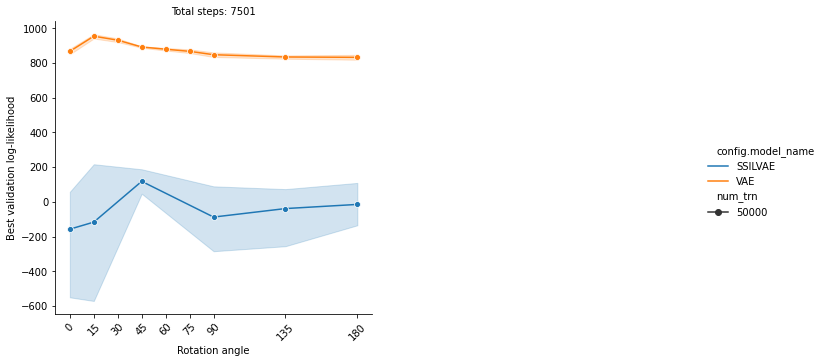

In [11]:
# create a sns lineplot, where the x-axis is the rotation angle, the y-axis is the best validation log-likelihood,
# and the hue is the number of training samples
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps', 'config.model_name']]

plot_df = plot_df[
    plot_df['config.total_steps'].isin([7501, 15003]) & plot_df['num_trn'].isin([50_000])
]

# map config.total_steps to consistent values, if they are in this dict
new_vals = {30003: 15001, 15003: 7501, 10003: 5001, 7003: 3501}
plot_df = plot_df.replace({'config.total_steps': new_vals})

g = sns.relplot(
    x="rotation_angle", y="summary.best_val_ll", hue="config.model_name", style="num_trn", col="config.total_steps",
    markers=True,
    # palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    data=plot_df
)
g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
g.set_titles('Total steps: {col_name}')
for ax in g.axes:
    ax.set_xticks(plot_df['rotation_angle'].unique())
    ax.set_xticklabels(plot_df['rotation_angle'].unique(), rotation=45)
plt.show()

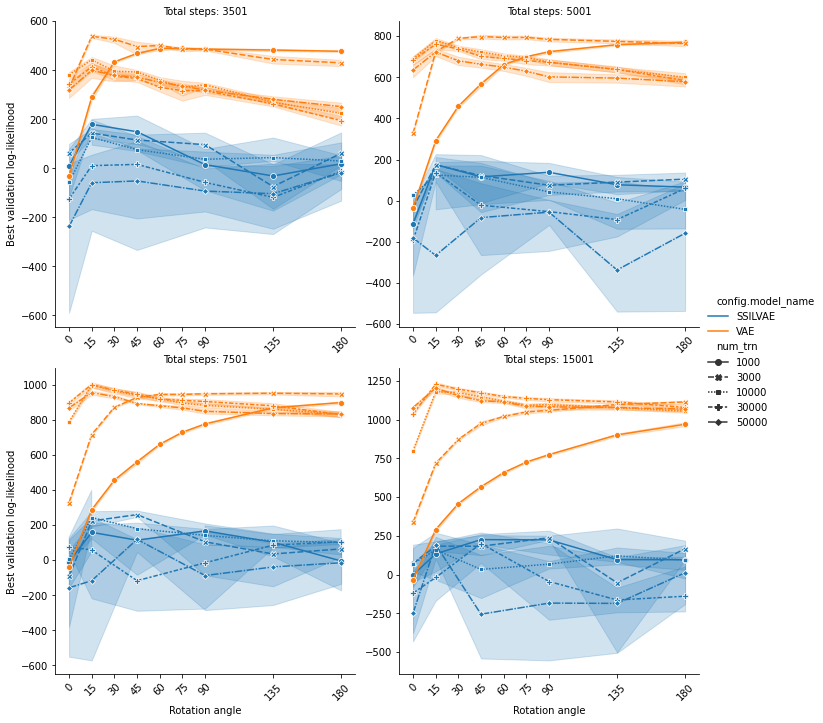

In [ ]:
# create a sns lineplot, where the x-axis is the rotation angle, the y-axis is the best validation log-likelihood,
# and the hue is the number of training samples
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps', 'config.model_name']]

# map config.total_steps to consistent values, if they are in this dict
new_vals = {30003: 15001, 15003: 7501, 10003: 5001, 7003: 3501}
plot_df = plot_df.replace({'config.total_steps': new_vals})

g = sns.relplot(
    x="rotation_angle", y="summary.best_val_ll", hue="config.model_name", style="num_trn", col="config.total_steps",
    markers=True,
    # palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    data=plot_df
)
g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
g.set_titles('Total steps: {col_name}')
for ax in g.axes:
    ax.set_xticks(plot_df['rotation_angle'].unique())
    ax.set_xticklabels(plot_df['rotation_angle'].unique(), rotation=45)
plt.show()

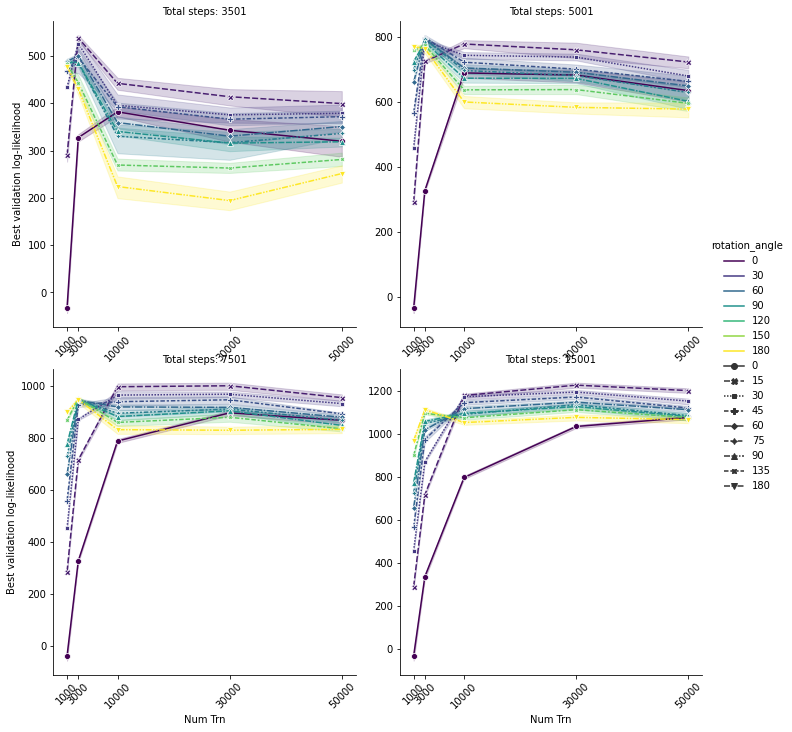

In [ ]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps', 'config.model_name']]
# take only runs with config.model_name = 'VAE'
plot_df = plot_df[plot_df['config.model_name'] == 'VAE']
g = sns.relplot(
    x="num_trn", y="summary.best_val_ll", hue="rotation_angle", style="rotation_angle", col="config.total_steps",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    data=plot_df
)
g.set_axis_labels('Num Trn', 'Best validation log-likelihood')
g.set_titles('Total steps: {col_name}')
for ax in g.axes:
    ax.set_xticks(plot_df['num_trn'].unique())
    ax.set_xticklabels(plot_df['num_trn'].unique(), rotation=45)
plt.show()

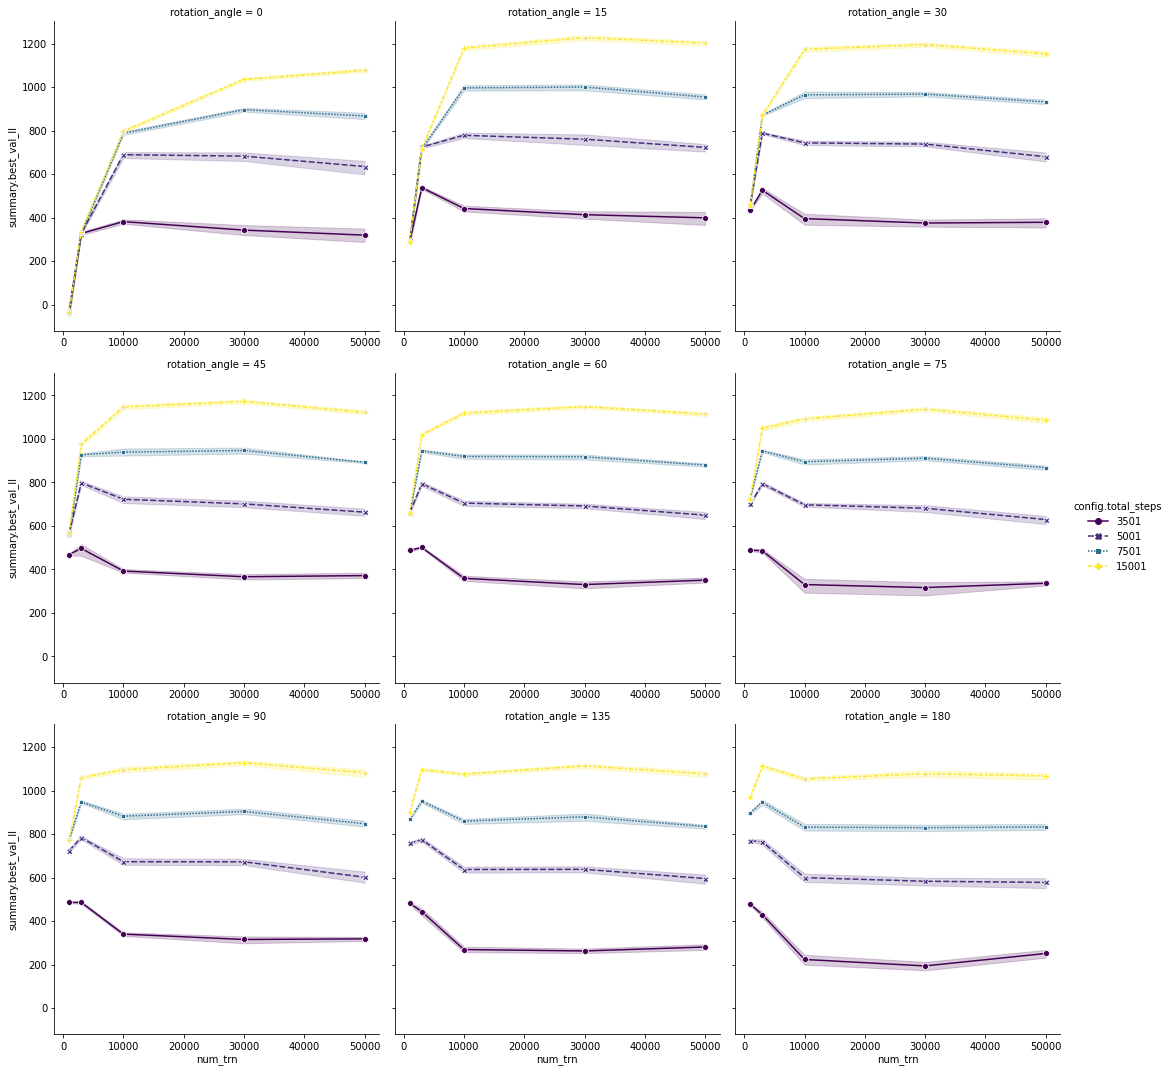

In [ ]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
plot_df = plot_df[plot_df['config.model_name'] == 'VAE']
g = sns.relplot(
    x="num_trn", y="summary.best_val_ll", hue="config.total_steps", style="config.total_steps", col="rotation_angle",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=3,
    facet_kws=dict(sharey=True, sharex=False),
    data=plot_df
)
plt.show()

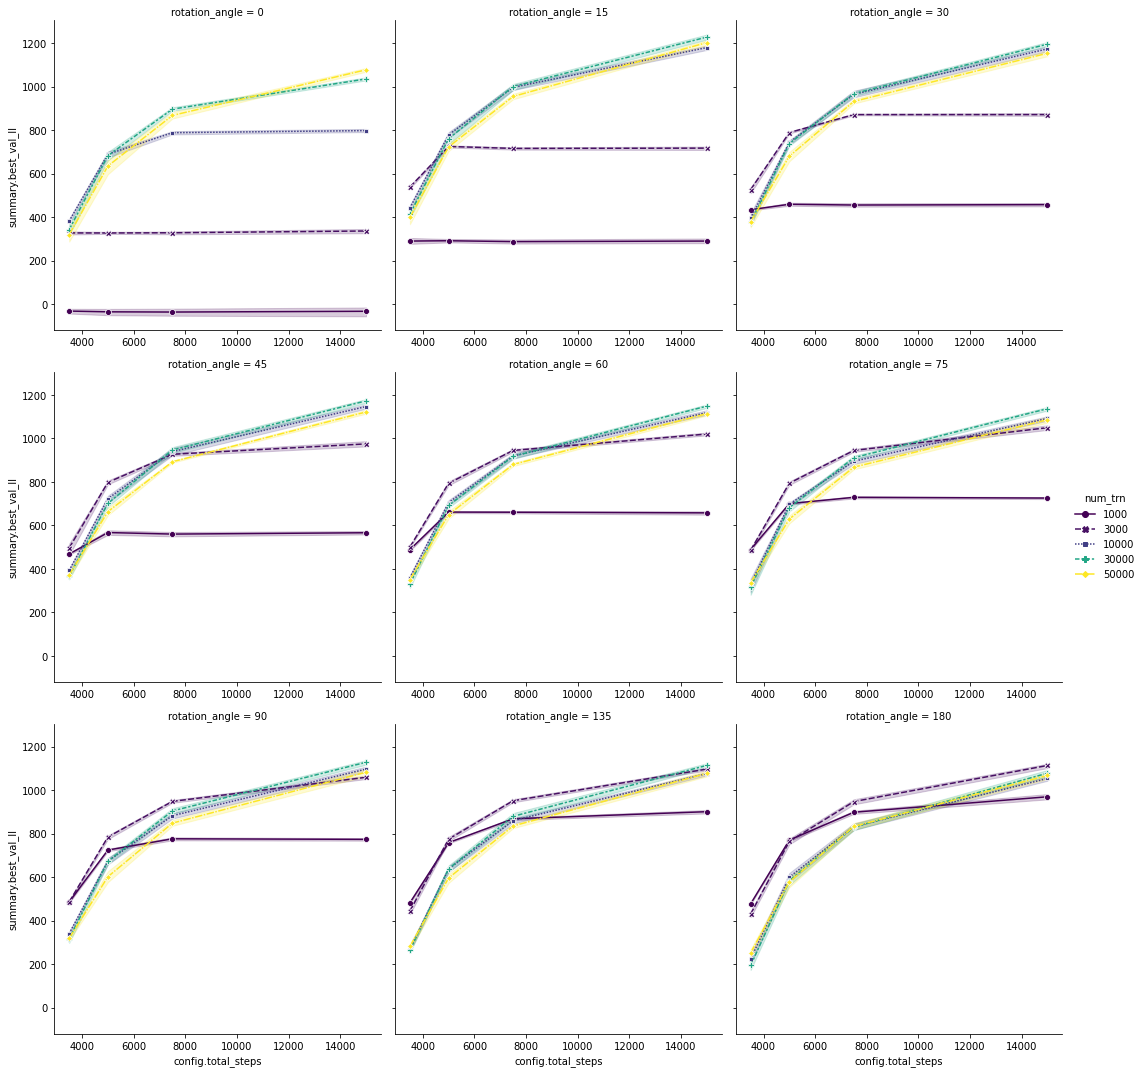

In [ ]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
plot_df = plot_df[plot_df['config.model_name'] == 'VAE']
g = sns.relplot(
    x="config.total_steps", y="summary.best_val_ll", hue="num_trn", style="num_trn", col="rotation_angle",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=3,
    facet_kws=dict(sharey=True, sharex=False),
    data=plot_df
)
plt.show()